# Análisis de las características de la muestra:

In [22]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
#import researchpy as rp
from scipy.stats import levene
from scipy.stats import kurtosistest

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

plt.rcParams["figure.figsize"] = (10,8) 

In [3]:
df = pd.read_csv('datos/2.bikes.csv', index_col=0)
df.head()

,index,instant,dteday,estaciones,yr,mnth,holiday,workingday,weathersit,weekday_num,weekday_cat,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,2018-01-01,winter,0,1,0,0,2,0,monday,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,2,2018-02-01,winter,0,1,0,0,2,3,thursday,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2,3,2018-03-01,winter,0,1,0,1,1,3,thursday,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,3,4,2018-04-01,spring,0,1,0,1,1,6,sunday,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,4,5,2018-05-01,spring,0,1,0,1,1,1,tuesday,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#vemos que en el csv se han 'aplanado' los datos y por lo tanto modificado el tipo de dato de la columna dteday:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        730 non-null    int64  
 1   instant      730 non-null    int64  
 2   dteday       730 non-null    object 
 3   estaciones   730 non-null    object 
 4   yr           730 non-null    int64  
 5   mnth         730 non-null    int64  
 6   holiday      730 non-null    int64  
 7   workingday   730 non-null    int64  
 8   weathersit   730 non-null    int64  
 9   weekday_num  730 non-null    int64  
 10  weekday_cat  730 non-null    object 
 11  temp         730 non-null    float64
 12  atemp        730 non-null    float64
 13  hum          730 non-null    float64
 14  windspeed    730 non-null    float64
 15  casual       730 non-null    int64  
 16  registered   730 non-null    int64  
 17  cnt          730 non-null    int64  
dtypes: float64(4), int64(11), object(3)
memory usage: 

In [5]:
#lo modificamos
df['dteday'] = pd.to_datetime(df['dteday'])

In [6]:
#confirmamos que el cambio se ha efectuado:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        730 non-null    int64         
 1   instant      730 non-null    int64         
 2   dteday       730 non-null    datetime64[ns]
 3   estaciones   730 non-null    object        
 4   yr           730 non-null    int64         
 5   mnth         730 non-null    int64         
 6   holiday      730 non-null    int64         
 7   workingday   730 non-null    int64         
 8   weathersit   730 non-null    int64         
 9   weekday_num  730 non-null    int64         
 10  weekday_cat  730 non-null    object        
 11  temp         730 non-null    float64       
 12  atemp        730 non-null    float64       
 13  hum          730 non-null    float64       
 14  windspeed    730 non-null    float64       
 15  casual       730 non-null    int64         
 16  register

## Exploración de las características de la muestra:


Es importante saber cómo se distribuye la muestra con la que estamos trabajando (normalidad, asimetría) así como otros factores pertinentes a ésta (homogeneidad de varianzas, etc.) para saber qué tipo de cálculos estadísticos podremos aplicar para contestar a nuestras preguntas de investigación.

- Normalidad -> esencial para realizar una regresión lineal.
- (A)simetría.
- Homogeneidad de varianzas

### Normalidad:

Antes de saber qué estadístico para explorar la normalidad, debemos de atender al tamaño muestral:
- Si la muestra es menor de 5000 (x < 5000), usaremos Saphiro.
- Si la muestra es mayor de 5000 (x > 5000), usaremos al señor ruso

In [7]:
print(f"La BBDD consta de {df.shape[0]} casos")

La BBDD consta de 730 casos


Usamos Saphiro.

#### Muestra 'casual':

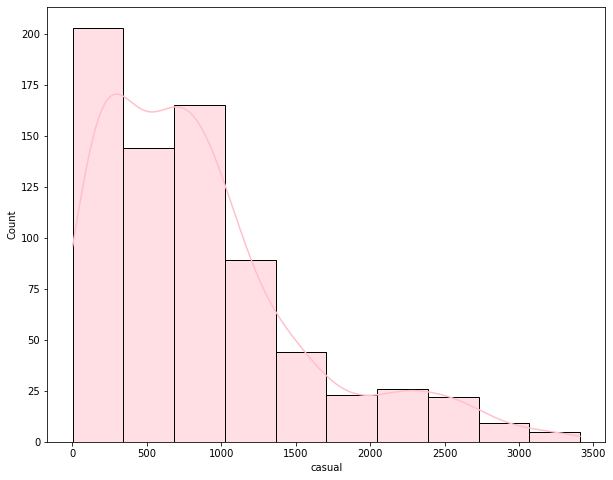

In [13]:
#comprobación gráfica:
sns.histplot(df["casual"], kde=True, bins=10, color='pink');

stats.shapiro(df["casual"]);

Ya vamos adivinando la distribución de la muestra: **No es normal**.   

Además, **la asimetría podría ser negativa**: Las personas, en este caso, que cogen la bicicleta de manera casual, tienden a hacerlo poco. Esto se observa en que las mayores frecuencias tienden a concentrarse a la izquierda (el principio del eje x)

In [14]:
stats.shapiro(df['casual'])

ShapiroResult(statistic=0.8850967288017273, pvalue=7.660028716313278e-23)

El p valor es > 0.05 (p=7.66), rechazamos H0: **Los datos de 'casual' no son normales**

### Muestra 'registrada':

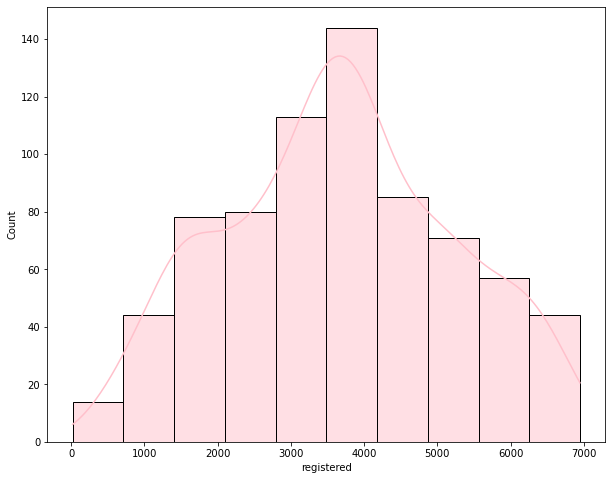

In [17]:
#comprobación gráfica:
sns.histplot(df["registered"], kde=True, bins=10, color='pink');

Parece que en el caso de las personas registradas, la distribución sí podría ser normal. Vamos a comprobarlo:

In [18]:
stats.shapiro(df['registered'])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

El p valor es > 0.05 (p=7.66), aceptamos H0: **Los datos de 'registered' son normales**

### Asimetría:

#### Datos 'casual'

In [29]:
stats.skewtest(df['casual'])

SkewtestResult(statistic=11.15903082194629, pvalue=6.469296630486003e-29)

La muestra de las personas que no están registradas es **asimétrica**, siendo esta asimetría estadísticamente significativa (p < 0.05)

#### Datos 'registered'

In [31]:
stats.skewtest(df['registered'])

SkewtestResult(statistic=0.45799609402950425, pvalue=0.6469552474750204)

La muestra de personas registradas es **simétrica** (statistic=0.46), siendo esta simetría estadísticamente significativa (p< 0.05)

La distribución de ambas variables es platicúrtica (p<0), por lo que tiene una distribución más planita.

## Homogeneidad de las varianzas:

La prueba de Levene para la igualdad de varianzas nos indica si podemos o no suponer varianzas iguales. Así si la probabilidad asociada al estadístico Levene es:  

- p >0.05 – suponemos varianzas iguales
- si es <0.05 – suponemos varianzas distintas.

#### Datos 'casual':

In [68]:

#almacenamos en una lista para consultarlo cuando queramos:
homo_cas = []
hetero_cas = []

for col in df.select_dtypes(include=np.number):
    print(f'para la columna {col.upper()}:')
    #print(stats.levene(df['casual'], df[col], center='median', proportiontocut=0.05))
    
    
    if (stats.levene(df['casual'], df[col], center='median', proportiontocut=0.05))[1] < 0.05:
        print(f'NO hay homogeneidad de varianzas para {col.upper()}, ya que p= {(stats.levene(df["casual"], df[col], center="median", proportiontocut=0.05))[1]}')
        print('------------------')
        homo_cas.append(col)

        
    else:
        print(f'Hay homogeneidad de varianzas para {col.upper()}, ya que p= {(stats.levene(df["casual"], df[col], center="median", proportiontocut=0.05))[1]}')
        print('------------------')
        hetero_cas.append(col)
        
        

para la columna INDEX:
NO hay homogeneidad de varianzas para INDEX, ya que p= 7.57565944713031e-64
------------------
para la columna INSTANT:
NO hay homogeneidad de varianzas para INSTANT, ya que p= 7.57565944713031e-64
------------------
para la columna YR:
NO hay homogeneidad de varianzas para YR, ya que p= 3.16613979225668e-141
------------------
para la columna MNTH:
NO hay homogeneidad de varianzas para MNTH, ya que p= 4.0777022810431975e-140
------------------
para la columna HOLIDAY:
NO hay homogeneidad de varianzas para HOLIDAY, ya que p= 1.952226337688453e-141
------------------
para la columna WORKINGDAY:
NO hay homogeneidad de varianzas para WORKINGDAY, ya que p= 2.6232175579606733e-141
------------------
para la columna WEATHERSIT:
NO hay homogeneidad de varianzas para WEATHERSIT, ya que p= 2.8423017397675974e-141
------------------
para la columna WEEKDAY_NUM:
NO hay homogeneidad de varianzas para WEEKDAY_NUM, ya que p= 1.103854929631097e-140
------------------
para la co

### Datos 'registered':

In [67]:

#almacenamos en una lista para consultarlo cuando queramos:
homo_res = []
hetero_res = []

for col in df.select_dtypes(include=np.number):
    print(f'para la columna {col.upper()}:')
    #print(stats.levene(df['casual'], df[col], center='median', proportiontocut=0.05))
    
    
    if (stats.levene(df['registered'], df[col], center='median', proportiontocut=0.05))[1] < 0.05:
        print(f'NO hay homogeneidad de varianzas para {col.upper()}, ya que p= {(stats.levene(df["registered"], df[col], center="median", proportiontocut=0.05))[1]}')
        print('------------------')
        homo_res.append(col)

        
    else:
        print(f'Hay homogeneidad de varianzas para {col.upper()}, ya que p= {(stats.levene(df["registered"], df[col], center="median", proportiontocut=0.05))[1]}')
        print('------------------')
        hetero_res.append(col)

para la columna INDEX:
NO hay homogeneidad de varianzas para INDEX, ya que p= 2.513965528688378e-168
------------------
para la columna INSTANT:
NO hay homogeneidad de varianzas para INSTANT, ya que p= 2.513965528688378e-168
------------------
para la columna YR:
NO hay homogeneidad de varianzas para YR, ya que p= 2.0613085773359724e-214
------------------
para la columna MNTH:
NO hay homogeneidad de varianzas para MNTH, ya que p= 8.411490920240263e-214
------------------
para la columna HOLIDAY:
NO hay homogeneidad de varianzas para HOLIDAY, ya que p= 1.5799057614033454e-214
------------------
para la columna WORKINGDAY:
NO hay homogeneidad de varianzas para WORKINGDAY, ya que p= 1.858597358336471e-214
------------------
para la columna WEATHERSIT:
NO hay homogeneidad de varianzas para WEATHERSIT, ya que p= 1.9424105633260445e-214
------------------
para la columna WEEKDAY_NUM:
NO hay homogeneidad de varianzas para WEEKDAY_NUM, ya que p= 4.0976049523854276e-214
------------------
para

## Conclusiones:

### 'Casual':

- **Normalidad**: La distribución **no** es normal.
- **Asimetría**: La muestra es asimétrica.
- **Homogeneidad de las varianzas**:
No hay homogeneidad de varianzas.

### 'Registered'

- **Normalidad**: La distribución **si** es normal.
- **Asimetría**: La muestra es simétrica.
- **Homogeneidad de las varianzas**:
No hay homogeneidad de varianzas.